In [1]:
from math import cos, sin, radians
from vec3 import Vec3, Z
from vgroove import G1, G2
from zipin import zipin, surface, Gzipin

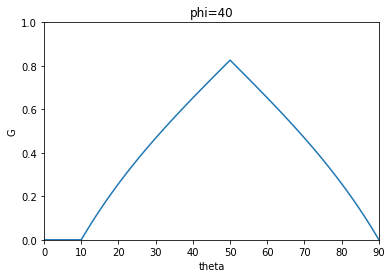

In [2]:
import matplotlib.pyplot as plt;

phi = 40
x = []
y = []
for theta in range(0,91):
    x.append(theta)
    y.append(Gzipin(radians(phi),radians(theta)))
    
plt.plot(x, y);
plt.axis([0,90,0,1])
plt.xlabel('theta')
plt.ylabel('G')
plt.title('phi={}'.format(phi))
plt.show()  

In [3]:
def check(theta, phi):

    hits = zipin(theta,phi)
    
    I, Hl = surface(phi, theta)
    Hr = Vec3(-Hl.x, Hl.y, Hl.z)
    N = Z
 
    for hit in hits:
        angle, area, bounce, side = hit
        if bounce == 1:
            a = radians(angle)
            O = Vec3(sin(a), 0.0, cos(a))
            if side == 'left':
                g = area*G1(N,Hl,I)
                h = G2(N,Hl,I,O)
            else:
                g = area*G1(N,Hr,I)
                h = G2(N,Hr,I,O)
            #print(hit,g,h)
            assert abs(g-h) < 0.0001
        
    return hits
    
for phi in range(1,91):
    for theta in range(0,91):
        check(radians(phi),radians(theta))
print('Passed')

Passed
